# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2025

Integrantes: **AGREGUEN SUS NOMBRES COMPLETOS** y la sección de cada integrante


## Instrucciones

1.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

2.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

3.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)? (Recuerde adjuntar código).

In [7]:
filas, columnas = tipos.shape
print("Dimensiones del dataset (filas, columnas): ", filas, columnas)

Dimensiones del dataset (filas, columnas):  4296 5


2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [13]:
print("Cada línea del dataset describe un número de accidentes especificando muestra, descripción, año, tipo de accidente y cantidad")

print("Ejemplo")
tipos.loc[235]

Cada línea del dataset describe un número de accidentes especificando muestra, descripción, año, tipo de accidente y cantidad
Ejemplo


Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [23]:
tipos['Anio'].unique()

array([2010, 2011])

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones más peligrosas en cuanto a accidentes de tránsito.

    **OJO**: hay que sumar la cantidad de accidentes para los distintos tipos de accidente de una misma región

Descripcion
I Región de Tarapacá                  1000
II Región de Antofagasta              2186
III Región de Atacama                  770
IV Región de Coquimbo                 2293
IX Región de la Araucanía             3985
Región Metropolitana                 23520
V Región de Valparaíso                7724
VI Región del Lib. Bdo. O´Higgins     3542
VII Región del Bio-Bio                6643
VII Región del Maule                  4390
X Región de Los Lagos                 2965
XI Región de Aysén                     598
XII Región de Magallanes              1020
XIV Región de Los Ríos                1180
XV Región Arica y Parinacota          1018
Name: Cantidad, dtype: int64


<Axes: xlabel='Descripcion'>

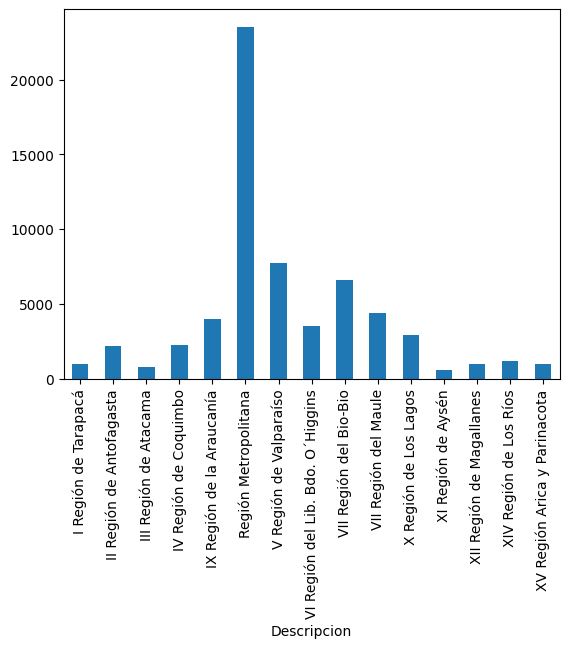

In [43]:
filtro = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2011)]
resultado = filtro.groupby(by = 'Descripcion')['Cantidad'].sum()
print(resultado)
resultado.plot(kind = "bar")

R: Es evidente que la región con mayor cantidad de accidentes es la Region Metropolitana. **Responder Después**

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

REVISAR
  TipoAccidente  Cantidad   Muestra  Anio
0     Atropello      8247  Regional  2010
1         Caida      1478  Regional  2010
2        Choque     14558  Regional  2010
3      Colision     29127  Regional  2010
4         Otros       707  Regional  2010
5     Volcadura      3629  Regional  2010


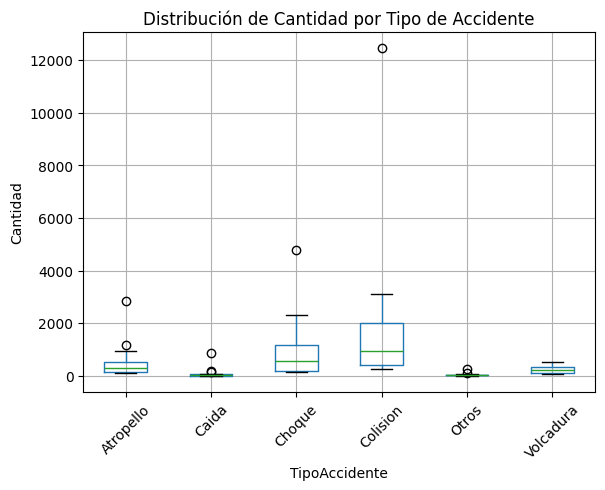

In [95]:
print('REVISAR')
filtro = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2010)]
resultado = (filtro.groupby(['TipoAccidente'], as_index=False).agg({'Cantidad': 'sum','Muestra': 'first', 'Anio': 'first'}))
print(resultado)
resultado = (filtro.groupby(['TipoAccidente']).agg({'Cantidad': 'sum'}))
filtro.boxplot(column='Cantidad', by='TipoAccidente', rot=45)
plt.ylabel('Cantidad')
plt.title('Distribución de Cantidad por Tipo de Accidente')
plt.suptitle('')
plt.show()

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

# Clasificación

Ahora crearemos un clasificador binario (por ahora no importa cómo funciona), y veremos que tal es su desempeño decidiendo si una persona tiene diabetes o no.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Droppear categoricas
df_clf = diabetes.drop(columns=['gender', 'smoking_history'])
# Separar atributos y target
X = df_clf.drop(columns=['diabetes'])
y = df_clf['diabetes']
# Separar conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
# Obtener predicciones
y_pred = clf.predict(X_test)

### Veamos su matríz de confusión

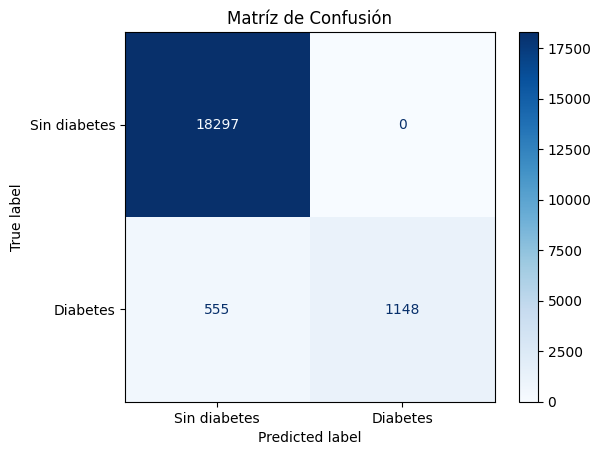

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

9. ¿Qué opina la visualización de la matriz de confusión? ¿Existe algún problema asociado al desbalance de clases? Corrija la visualización según sus observaciones.

Puede ser útil ver la documentación de [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

R:

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

10. ¿Qué se puede decir a partir de la matriz de confusión? ¿El clasificador tiene un problema asociado a precision o recall?

R:

### Curva ROC 🤘

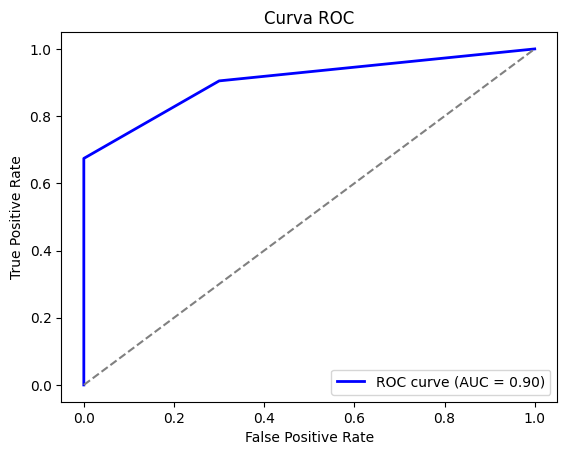

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Identidad
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

11. ¿Podemos decir que el modelo es bueno según su curva ROC? ¿Para que podemos usar esta visualización?

R:

12. ¿Sería seguro usar este clasificador en un caso real diagnosicando pacientes?

R:

Y eso es todo por hoy :)
